### Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [142]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

In [75]:

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [76]:
df.shape

(7043, 21)

In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
260,7273-TEFQD,Male,1,No,No,3,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,41.15,132.2,Yes
2561,3230-JCNZS,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,No
4454,8410-BGQXN,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,93.4,No
3489,0975-UYDTX,Female,0,Yes,No,26,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),90.10,2312.55,No


## check duplicate:

In [80]:
df.duplicated().sum()

0

##### No duolicates are present

## check null values:

In [81]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
df.isnull().sum().sum()

0

<AxesSubplot:>

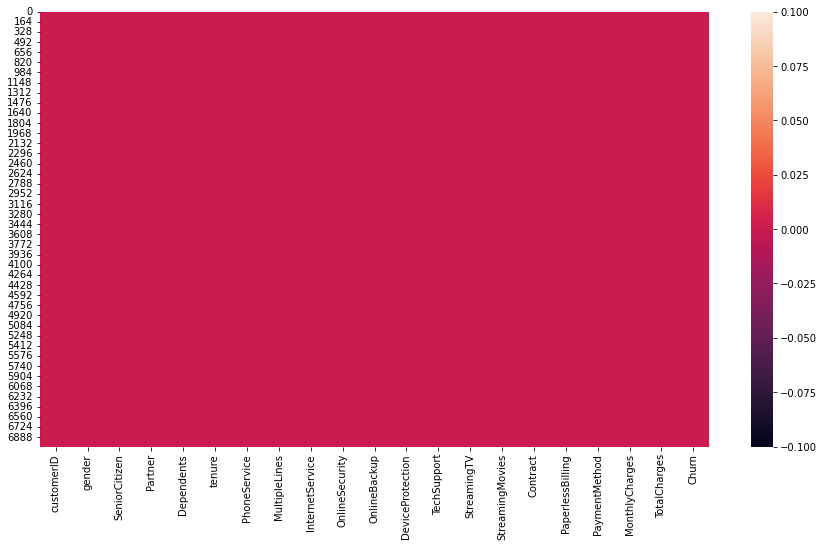

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

## correlation:

In [84]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

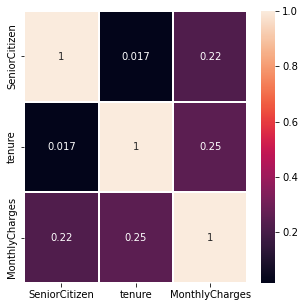

In [85]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, linecolor='white',linewidths=.25)

In [86]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [87]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [88]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [89]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [90]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [91]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [92]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [95]:
df.groupby('InternetService').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
InternetService,,,,,,,,,,,,,,,,,,,,
DSL,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421
Fiber optic,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096
No,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526


In [96]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [97]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [98]:
df.groupby('DeviceProtection').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
DeviceProtection,,,,,,,,,,,,,,,,,,,,
No,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095
No internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
Yes,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422


In [99]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [100]:
df.groupby('OnlineBackup').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
OnlineBackup,,,,,,,,,,,,,,,,,,,,
No,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088
No internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
Yes,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429


## descriptive statestics:

In [101]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen is actually categorical hence the 25%-50%-75% distribution is not proper
We can also conclude that 75% of people have tenure.
Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month

Text(0.5, 1.02, 'Count of TARGET Variable per category')

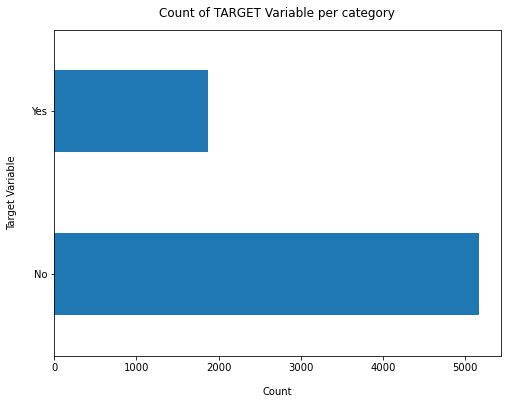

In [102]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [103]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [104]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In the above output, we can see that our dataset is not balanced at all i.e. Yes is 27 around and No is 73 around

## Data Cleaning:

In [105]:
df2 = df.copy()

In [106]:
df2.TotalCharges = pd.to_numeric(df2.TotalCharges, errors='coerce')
df2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we can see that there are a lot of missing values in the Total charges column

In [107]:
df2.loc[df2 ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


##### Removing missing values:

In [108]:
df2.dropna(how = 'any', inplace = True)

Remove columns not required for processing

In [109]:
df2.drop(columns= ['customerID'], axis=1, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Univariate Analysis:

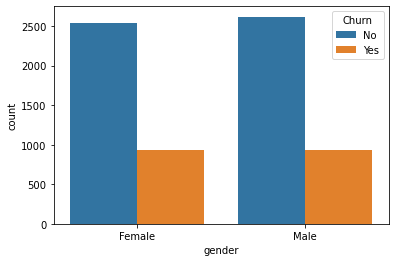

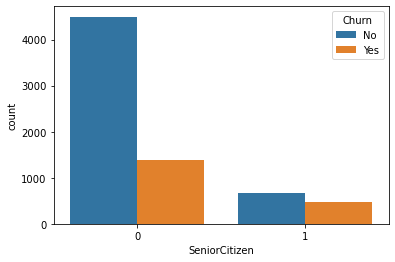

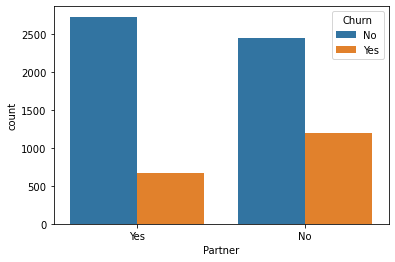

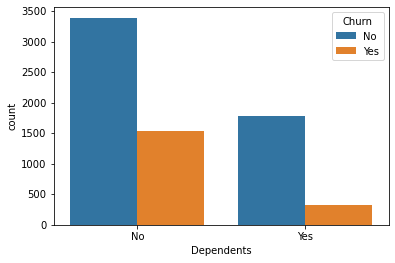

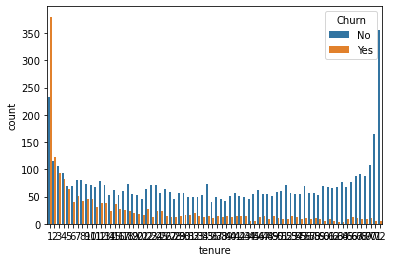

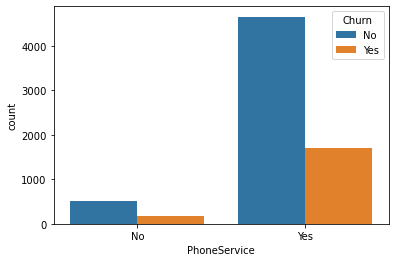

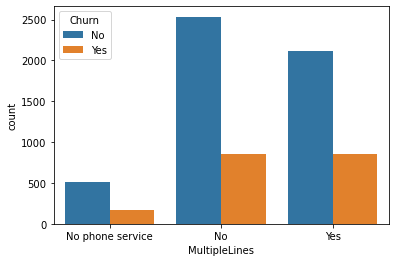

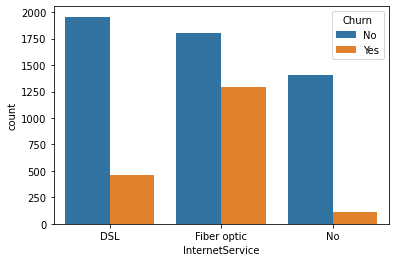

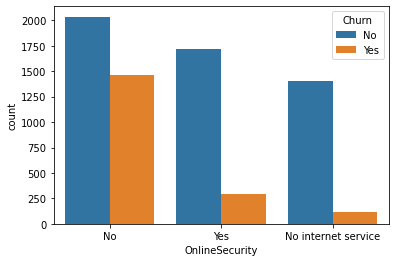

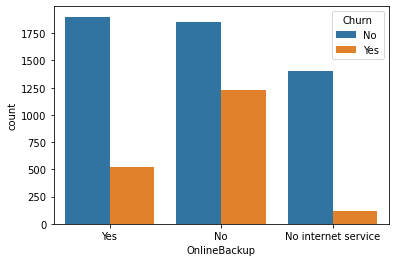

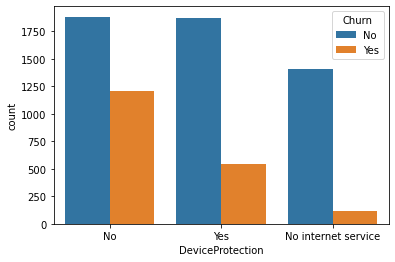

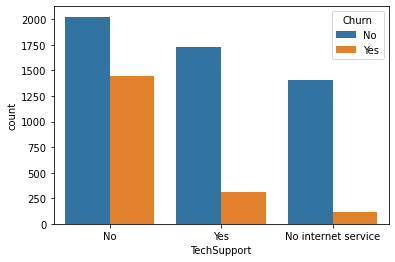

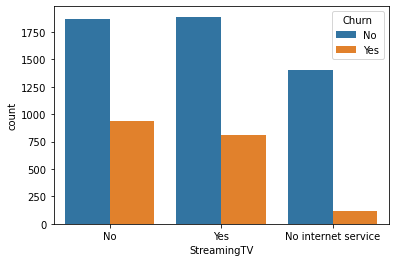

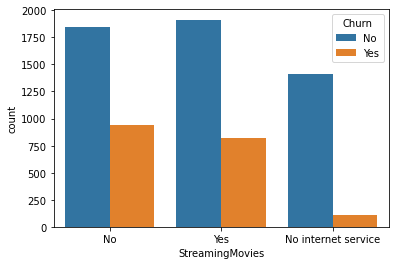

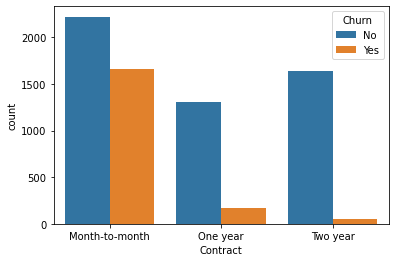

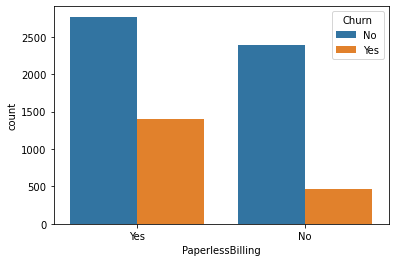

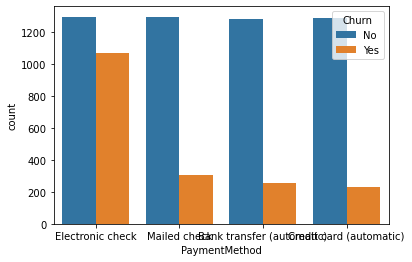

In [110]:
for i, predictor in enumerate(df2.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df2, x=predictor, hue='Churn')

Here as we know we can’t have character values for our ML model so hence we should convert it into binary numerical values i.e. Yes=1; No = 0

In [111]:
df2['Churn'].replace('Yes',1,inplace=True)
df2['Churn'].replace('No',0,inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Now we have to convert the categorical data into dummy variables with the getting dummies function.

In [112]:
df3 = pd.get_dummies(df2)
df3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Here we will be making a regression plot between charges.

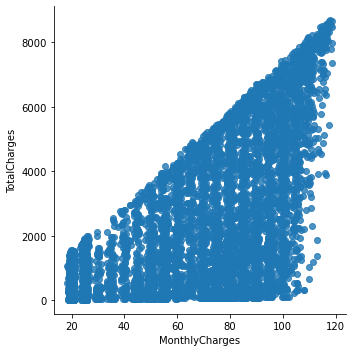

In [113]:
sns.lmplot(data=df3, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Here from the above graph it is clear that as the monthly charges are increasing we can experience the total charges also increase which shows the positive correlation too.

## set variable:

In [114]:
x= df3.drop(columns = "Churn")
y = df3["Churn"].values

In [115]:
x.shape,y.shape

((7032, 45), (7032,))

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4, stratify =y)

In [117]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

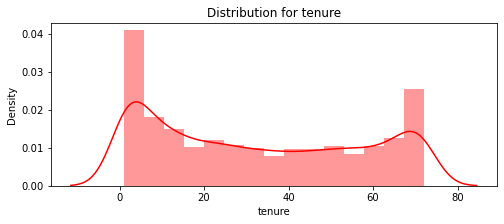

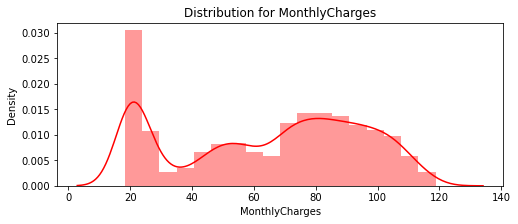

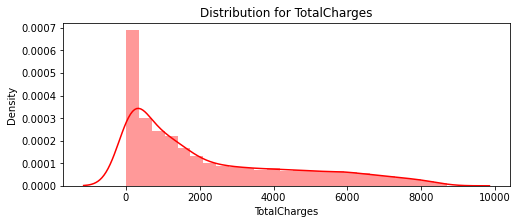

In [118]:
col =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :distplot(features,df3)

The features need standard scaling as all of them are distributed over different range values

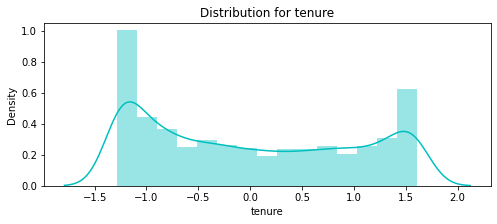

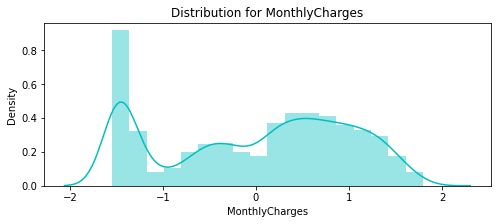

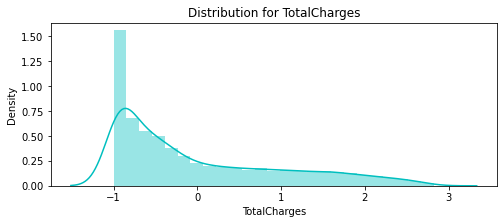

In [119]:
data_std = pd.DataFrame(StandardScaler().fit_transform(df3[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, data_std, color='c')

In [120]:
scaler = StandardScaler()
x_train[col] = StandardScaler().fit_transform(x_train[col])
x_test[col] = StandardScaler().fit_transform(x_test[col])

## Model building:

In [121]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[RD_model,DT_model,SV_model,KNR_model,ADA_model,GB_model ]

In [122]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 80.09478672985783
Confusion Matrix of  RidgeClassifier()  is 
 [[1403  146]
 [ 274  287]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.66      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 71.70616113744076
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[1224  325]
 [ 272  289]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1549
           1       0.47      0.52      0.49       561

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.73      0.72      0.72      2110

*********************

## cross validation:

In [126]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 80.09478672985783
cross Validation accuracy score of  RidgeClassifier()  is  80.14767657344247
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 71.70616113744076
cross Validation accuracy score of  DecisionTreeClassifier()  is  72.24100994721576
**************************************************
Accuracy_Score of  SVC() is 79.5734597156398
cross Validation accuracy score of  SVC()  is  73.42150252598015
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 76.77725118483413
cross Validation accuracy score of  KNeighborsClassifier()  is  76.0523030043847
**************************************************
Accuracy_Score of  AdaBoostClassifier() is 81.27962085308057
cross Validation accuracy score of  AdaBoostClassifier()  is  80.7166362861571
**************************************************
Accuracy_Score of  GradientBoostingClassifier() is 80.3317535545023

## Hyper Parameter tuning:


### Gridsearch:

In [139]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using Gridsearchcv
x_train,x_test, y_train, y_test=train_test_split(x,y, random_state = 100, test_size = 0.33)

KNN =KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KNN,parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 14}

In [131]:
GCV_pred=gridsearch.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7725118483412322

In [135]:
ABC = AdaBoostClassifier()

ABC_param_grid = {"n_estimators" :[10,50,100,200,420],
                  "learning_rate":  [0.001, 0.01, 0.1, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsABC.fit(x_train,y_train)

ada_best = gsABC.best_estimator_
print(ada_best)
print(gsABC.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
0.8472503322390038


In [136]:
bestAdaModFitted2 = gsABC.best_estimator_.fit(x_train, y_train)

In [140]:
test_labels = bestAdaModFitted2.predict_proba(np.array(x_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8459378720154533

## model saving:

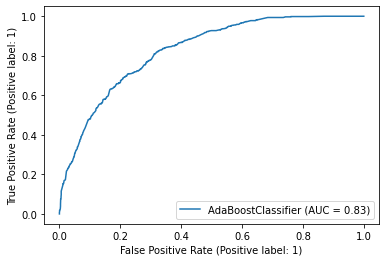

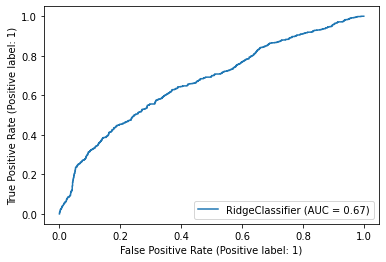

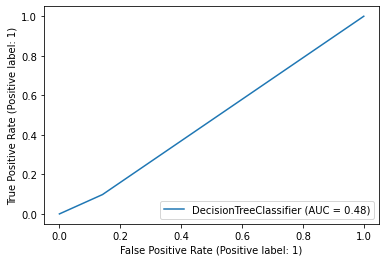

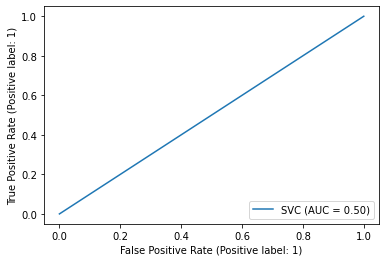

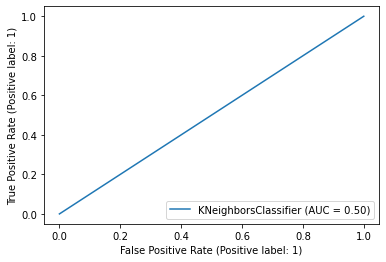

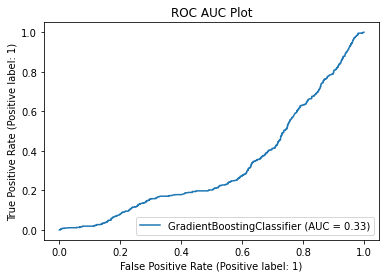

In [132]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(ADA_model,x_test,y_test)
plot_roc_curve(RD_model,x_test,y_test)
plot_roc_curve(DT_model,x_test,y_test)
plot_roc_curve(SV_model,x_test,y_test)
plot_roc_curve(KNR_model,x_test,y_test)
plot_roc_curve(GB_model,x_test,y_test)

plt.title('ROC AUC Plot')
plt.show()

In [143]:
#Use pickle to save our model so that we can use it later


# Saving model to disk
pickle.dump(ada_best, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

Customers with higher Monthly Charges are also more likely to churn.
New customers are more likely to churn.
We could use Hyperparamete Tuning or Feature enginnering methods to improve the accuracy further.
Adaboostclassifier is the best classification model for telecom churn prediction